# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from skimage import io
from skimage import img_as_uint
from glob import glob
import numpy as np
import yaml
from enhancer import Enhancer
import os.path as path
from lsm_utils import normalize_16bit_images, compute_norm_range

# Load data 
- SHG samples
- load model config data from yaml file

In [4]:
vmin_t, vmax_t, fail_names_t = compute_norm_range('cropped_sample_data/target', ext='tif', percentiles=(1, 99.5), sample_r=1)
vmin_i, vmax_i, fail_names_i = compute_norm_range('cropped_sample_data/input', ext='tif', percentiles=(1, 99.5), sample_r=1)
vmin = min(vmin_i, vmin_t)
vmax = max(vmax_i, vmax_t)
if len(fail_names_i + fail_names_t) != 0:
    print('Datasets corrupted: input: {fail_names_i}, target: {fail_neams_t}')

cropped_sample_data/target\*.tif


100%|██████████| 1/1 [00:00<00:00, 125.31it/s]


cropped_sample_data/input\*.tif


100%|██████████| 1/1 [00:00<00:00, 143.33it/s]


In [5]:
vmin, vmax, fail_names = compute_norm_range('cropped_sample_data', ext='tif', percentiles=(1, 99.5), sample_r=1)
config = yaml.load(open("model_config.yaml", "r"), Loader=yaml.FullLoader)
config['dataset'] = 'cropped_sample_data'
config['norm-range'] = [int(vmin), int(vmax)]


cropped_sample_data\*.tif


100%|██████████| 1/1 [00:00<00:00, 143.19it/s]


# Create Enhancer instance

In [6]:
import torch
enhancer = Enhancer(config, scale_factor=2, perceptual_loss=False, adversarial_loss=False)
enhancer.backbone.load_state_dict(torch.load(path.join('model_weights', 'enhancer.pth')))

<All keys matched successfully>

# Get enhanced image

In [7]:
image = io.imread("cropped_sample_data/PB522-14-MAX_Fused.tif")
print(image.shape)

output = enhancer.compute(image)

(256, 256)


# Display result 

Original on left and resulting image on right

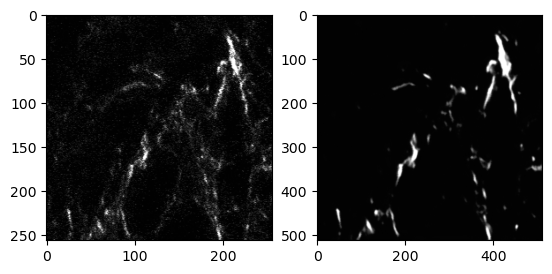

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(output, cmap='gray')

cropped_sample_data\*.tif


100%|██████████| 1/1 [00:00<00:00, 143.21it/s]


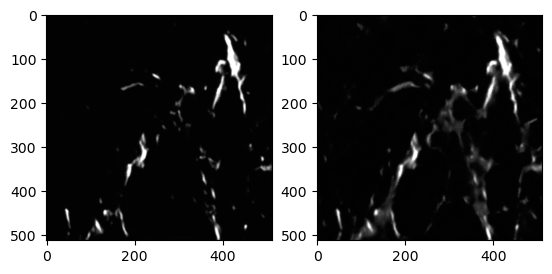

In [9]:
from super_resolution_script import compute_sr
script_out = compute_sr()

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(output, cmap='gray')
ax[1].imshow(script_out, cmap='gray')

